In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load preprocessed data
X_train = np.load("../data/X_train.npy")
X_test  = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test  = np.load("../data/y_test.npy")

X_train.shape, y_train.shape


d:\New folder\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


((1323, 30, 1), (1323, 1))

In [2]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.summary()


d:\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)


In [4]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0213 - val_loss: 0.0222
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0199 - val_loss: 0.0228
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0198 - val_loss: 0.0215
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0195 - val_loss: 0.0232
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0193 - val_loss: 0.0218
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0195 - val_loss: 0.0215
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0195 - val_loss: 0.0214
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0196 - val_loss: 0.0218
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0195 - val_loss: 0.0221
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0195 - val_loss: 0.0214
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0193 - val_loss: 0.0224
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

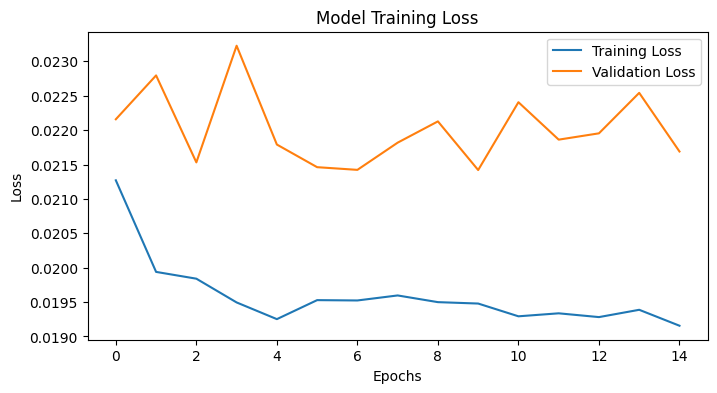

In [5]:
plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [6]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221
Test Loss (MSE): 0.022084034979343414


In [7]:
model.save("../model/lstm_demand_forecast.h5")


In [8]:
from tensorflow.keras.models import load_model

model = load_model("../model/lstm_demand_forecast.h5")



In [9]:
y_pred_scaled = model.predict(X_test)

y_pred_scaled[:5]


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


array([[0.20258655],
       [0.20326692],
       [0.20410542],
       [0.206313  ],
       [0.20772518]], dtype=float32)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv("../data/train.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

STORE_ID = 1
PRODUCT_FAMILY = df["family"].unique()[0]

ts_df = df[
    (df["store_nbr"] == STORE_ID) &
    (df["family"] == PRODUCT_FAMILY)
][["sales"]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(ts_df)

y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred_scaled)

y_pred_actual[:5]


array([[3.8491445],
       [3.8620715],
       [3.8780031],
       [3.919947 ],
       [3.9467785]], dtype=float32)

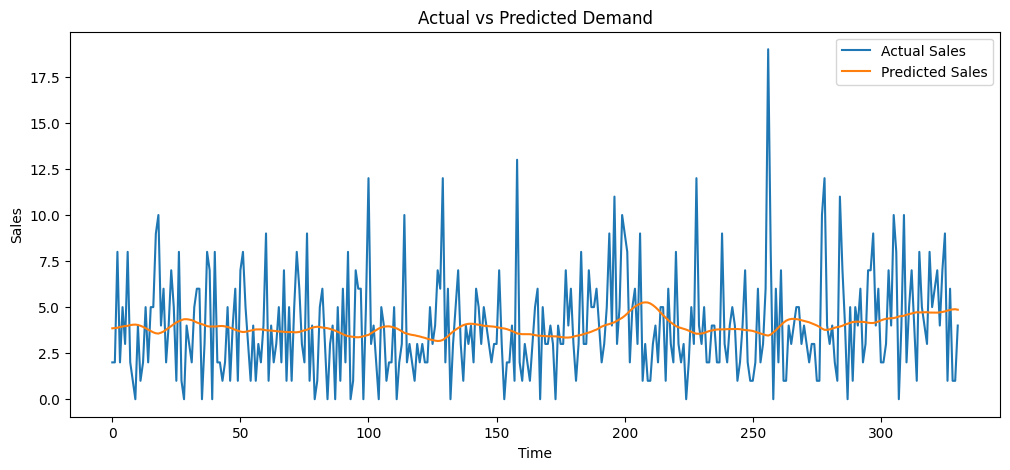

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label="Actual Sales")
plt.plot(y_pred_actual, label="Predicted Sales")
plt.title("Actual vs Predicted Demand")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_actual, y_pred_actual)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 2.1709727203737934


## Ethical Considerations & Responsible AI

This project uses anonymized and publicly available retail sales data.
No personal or sensitive user information is collected or processed.

The model predictions are intended for analytical and educational purposes only.
They should not be used as the sole basis for business decisions without human oversight.

The system promotes responsible AI usage by ensuring transparency in methodology
and by clearly communicating limitations of the model.
